### **SPARSE AUTOENCODER**

1. It adds a sparsity constraint

2. It forces most of the neurons to be zero

3. It learns all the meaningful features from the image by creating a sparse representations of the input features.

### **Steps used in this Algorithm:-**

1.   Import all the necessary Libraries

2.   Load the dataset

3.   Do Data Preprocessing and normalize the data

4.   Flatten Images

5.   Model Architecture and build the Sparse Autoencoder model

6.   Compile the Sparse Model

7.   Train the Sparse Model

8.   Evaluate the Sparse model

9.   Plot the accuracy vs loss

10.  Reconstruct Images Using the Trained Model

11.  Visualize Original vs Reconstructed Images

### Step 1: Import all the necessary Libraries

In [174]:
import     numpy                as     np
import     pandas               as     pd
import     matplotlib.pyplot    as     plt
import     seaborn              as     sns

import     tensorflow           as     tf

from       tensorflow.keras.datasets    import   mnist
from       tensorflow.keras.models      import   Sequential
from       tensorflow.keras.layers      import   Dense, Dropout, Flatten, BatchNormalization
from       tensorflow.keras.optimizers  import   Adam
from       tensorflow.keras             import   regularizers


### **OBSERVATIONS:**

1.   pandas ------------> It is used for performing the data analysis and data manipulation tasks.

2.   numpy -------------> It is used for performing the mathematical operations in the Arrays.

3.   matplotlib ----------> It is used for performing the data visualization tasks.

4.   seaborn -----------> It is used to perform the data correlation among the variables.

5.   tensorflow ----------> It refers to the framework for building the neural network model.

6.    mnist ----------------> It is a dataset that represents the handwritten digits

7.    Sequential ----------> It can be defined as the linear stack of layers that can be placed one above the another.

8.    Flatten -----------> converts the vector into 1D vector

9.    Dense -------------> forms a dense connected neural network

10.   Adam -------------> optimizes the learning rate so as to increases the convergence speed.

11. regularizers ---------> It helps in regularizing the output activations of the neurons not the weights

### Step 2:  Load the dataset

In [175]:
### Split the data into the training and testing data

(X_train, Y_train),(X_test, Y_test) =mnist.load_data()

###**Input Data:**

In [176]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [177]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [178]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testig data   is:", X_test.shape)

Shape of the input training data is: (60000, 28, 28)
Shape of the input testig data   is: (10000, 28, 28)



### **OBSERVATIONS:**

1.    The mnist handwritten digits dataset is loaded .

2.    Then this dataset is divided into training and testing data

3.    The input training data has 60000 input training labels with 28 * 28 pixels

4.    The input testing data has 10000 input testing labels with 28 * 28 pixels

5.    In the Autoencoder, we have only inputs and no outputs as Autoencoder is an example of unsupervised learning.

### Step 3:  Do Data Preprocessing and normalize the data


In [179]:
### Normalize the input pixel values

X_train = X_train.astype('float32')/255.0
X_test  = X_test.astype('float32')/255.0

In [180]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [181]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### **OBSERVATIONS:**

1.  After performing the normalization on the input pixel values, the pixel values get scaled from 0 to 255 till 0 to 1.

2.  This normalization is performed because the neural network model can only work with the normlaized input data.

### Step 4:  Flatten Images

In [182]:
X_train.shape

(60000, 28, 28)

In [183]:
### Flatten all the input images to 2d

X_train = X_train.reshape((len(X_train), 784))

X_test = X_test.reshape((len(X_test), 784))

In [184]:
X_train.shape

(60000, 784)

In [185]:
X_test.shape

(10000, 784)

### **OBSERVATIONS:**

1.  All the input gearures has been converted from 3d ----> 2d because the autoencoder model accepts the input in the form of 2d.

### Step 5: Model Architecture and build the Sparse Autoencoder model

In [186]:
### Construct the Sparse autoencoder model

sparse_autoencoder_model = Sequential([
    ### Construct the encoder layer
    Dense(128,activity_regularizer=regularizers.l1(1e-5),activation='relu',input_shape=(784,))                     ,
    Dense(64,activity_regularizer=regularizers.l1(1e-5),activation='relu')                                         ,

    ### Construct the decoder layer
    Dense(128, activation='relu')                                                                                  ,
    Dense(784, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **OBSERVATIONS:**

1.  The object for the sparse autoencoder sequential model has been initialized.

2.  First of all we have the total input features as 784

3.  Then we compress 784 features ------> 128 features with the help of l1 regularizers to regularize the output actiavtion of the neurons to imrprove the convergence speed.

4.  Again we compress 128 features -------> 64 features with the help of l1 regularizers to regularize the output actiavtion of the neurons to imrprove the convergence speed.

5.  The above process is known as encoding.

6.  Then begins with the decoding process

7.  We decode the features from 64 --------------> 128 features

8.  Again we decode from 128 ---------------------> 784 features

9.  This process is known as decoding

10. So here in this model, we try to compress the size of the corrupted input image so as to extract all the essential information from it and then we contruct the original image from the corrupted input image.

In [187]:
### Get the summary of the model

sparse_autoencoder_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Compile the Sparse Autoencoder Model

In [188]:
### Compile the model

sparse_autoencoder_model.compile(
    optimizer        =             'adam'                          ,
    loss             =             'binary_crossentropy'           ,
    metrics          =             ['accuracy']
)

### **OBSERVATIONS:**


1.   The model has been made ready for the training purpose with the help of the following parameters:-


(a.) optimizer = 'adam' . It is used to make the learning rate as dynamic and improves the convergence speed.

(b.) loss = 'binary_crossentropy'. It is a binary loss function as it is used to solve the binary classification problem.

(c.) metrics = 'accuracy'. It is used to evaluate the performance of the model.

### Step 7:  Train the Sparse Model

In [189]:
### Train the model

history=sparse_autoencoder_model.fit(
    X_train                                            ,
    X_train                                            ,
    epochs            =         10                     ,
    batch_size        =        256                     ,
    validation_data   =         (X_test,X_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.0129 - loss: 0.4688 - val_accuracy: 0.0177 - val_loss: 0.2554
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0144 - loss: 0.2487 - val_accuracy: 0.0098 - val_loss: 0.2252
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0113 - loss: 0.2203 - val_accuracy: 0.0079 - val_loss: 0.2053
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.0113 - loss: 0.2029 - val_accuracy: 0.0080 - val_loss: 0.1908
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0075 - loss: 0.1880 - val_accuracy: 0.0072 - val_loss: 0.1804
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0072 - loss: 0.1796 - val_accuracy: 0.0114 - val_loss: 0.1733
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0100 - loss: 0.1728 - val_accuracy: 0.0107 - val_loss: 0.1677
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.0115 - loss: 0.1679 - val_accu

### **OBSERVATIONS:**

1.  The sparse autoencoder model has been trained with the help of the following parameters:-

(a.) training data ----------------> X_train, X_train_noisy

.   X_train         ------->   input image     (input)

.   X_train       ------->     output image  (output)

The input training image is both the input and the output as the autoencoder is the part of unsupervised learning.

(b.) epochs = 10 ------------> 10 iterations are needed to train the model

(c.) batch_size = 256 -------> the weights get updated after every 256 samples

(d.) validation_data --------> Input test data is X_test, Output_test_data is X_test

### Step 8:  Evaluate the Sparse model

In [190]:
loss, acc = sparse_autoencoder_model.evaluate(X_test, X_test)

print("Loss value of the model is:", loss)

print("Accuracy of the model is:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0138 - loss: 0.1481
Loss value of the model is: 0.14852404594421387
Accuracy of the model is: 0.014000000432133675


### Step 9:  Plot the accuracy vs loss

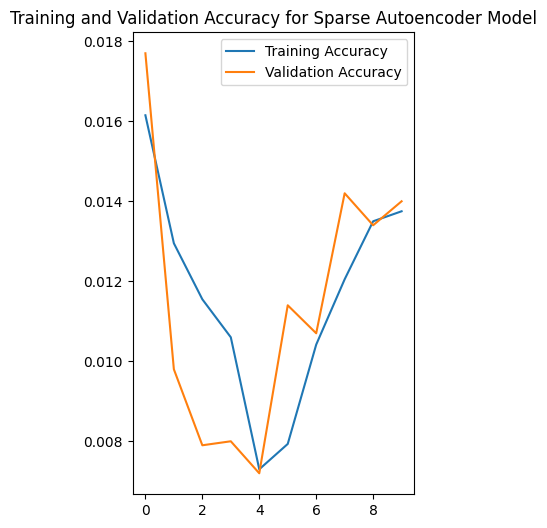

In [191]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy for Sparse Autoencoder Model')
plt.legend()
plt.show()

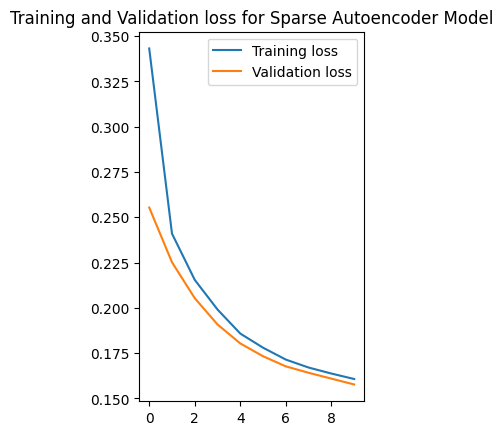

In [192]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Training and Validation loss for Sparse Autoencoder Model')
plt.legend()
plt.show()

### **OBSERVATIONS:**

1.  This code visualizes model performance after training using the history objects of both the models for the Accuracy and loss.

2.  It depicts about the training and Validation accuracy as well as for loss and Validation loss.

### Step 10: Reconstruct Images Using the Trained Model

In [193]:
decoded_imgs = sparse_autoencoder_model.predict(X_test)

print(decoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.45252885e-08 9.41080636e-09 1.34628344e-08 ... 1.08618918e-08
  1.45239030e-08 1.64968643e-08]
 [5.78715390e-06 5.61113620e-06 6.42516943e-06 ... 4.93419338e-06
  5.34047240e-06 5.22043865e-06]
 [1.40304888e-08 1.35322411e-08 1.67446075e-08 ... 1.48827404e-08
  1.37206166e-08 8.75630946e-09]
 ...
 [3.15895522e-06 3.45061426e-06 3.21444077e-06 ... 4.27767463e-06
  2.85696910e-06 3.45587659e-06]
 [4.28947969e-05 5.92569559e-05 4.71844833e-05 ... 5.23428826e-05
  3.93516966e-05 4.87530124e-05]
 [3.92891877e-07 4.15306744e-07 3.10655111e-07 ... 3.68892074e-07
  3.00248814e-07 3.50874160e-07]]


### Step 11: Visualize Original vs Reconstructed Images

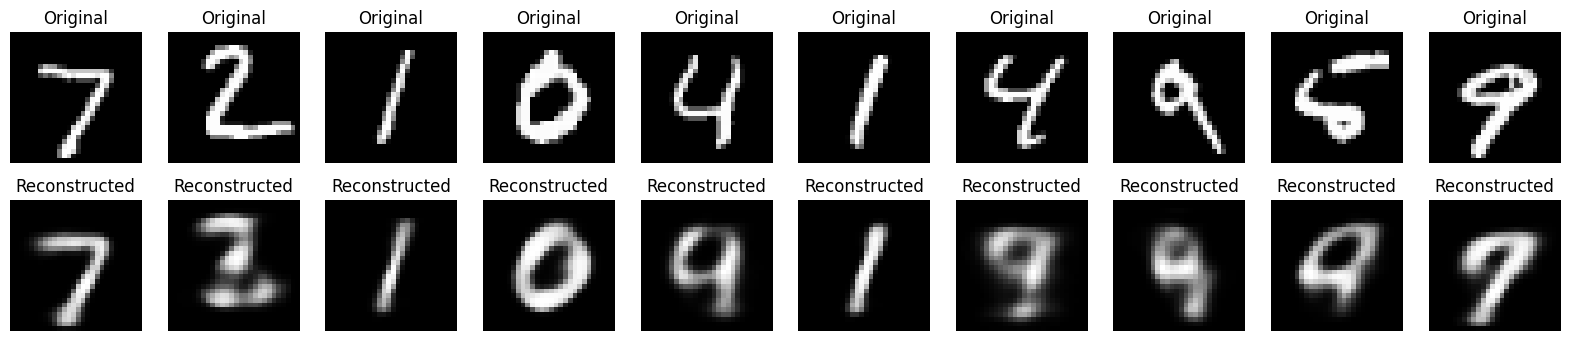

In [194]:
n = 10  # Show 10 images
plt.figure(figsize=(20,4))

for i in range(n):
    # Display original  input image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    plt.axis("off")

    # Display reconstructed input  image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstructed")
    plt.axis("off")

plt.show()



### **OBSERVATIONS:**

1. Here we have performed the visualization between the Original image vs Reconstructed image.

2. We have made the comparision between the two and came to the conclusion that both the images looks the same.

3. So the Autoencoder is working fine.